# ゼロから作るDeep Learning

## 3章 ニューラルネットワーク

### 3.2 活性化関数

#### 3.2.1 シグモイド関数(sigmoid function)

$$
h(x) = \frac{1} {1+\exp(-x)}
$$

$$
h(x) = \frac{1} {1+e^{-x}}
$$

#### 3.2.2 ステップ関数の実装

In [1]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [2]:
step_function(3.0)

1

In [ ]:
import numpy as np
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [ ]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [ ]:
y = x > 0

In [ ]:
y

array([False,  True,  True], dtype=bool)

In [ ]:
y = y.astype(np.int)
y

array([0, 1, 1])

#### 3.2.3 ステップ関数のグラフ

In [8]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

In [9]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

<ipython-input-8-8f16a3f02ef7>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0, dtype=np.int)


In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

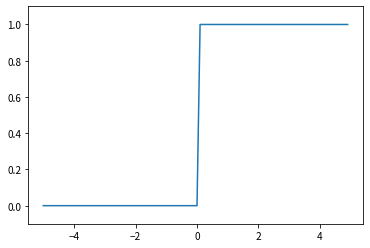

In [11]:
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y軸の範囲を指定
plt.show()

#### 3.2.4 シグモイド関数の実装

In [12]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [13]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [14]:
t = np.array([1.0, 2.0, 3.0])
print(1.0 + t)
print(1.0 / t)

[2. 3. 4.]
[1.         0.5        0.33333333]


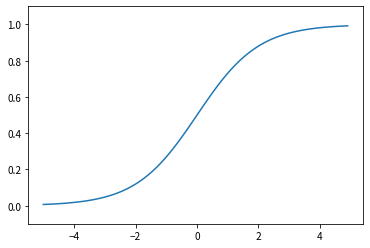

In [17]:
import matplotlib.pylab as plt

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

<ipython-input-8-8f16a3f02ef7>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0, dtype=np.int)


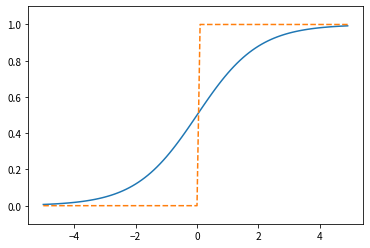

In [18]:
# ステップ関数とシグモイド関数
import matplotlib.pylab as plt

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
y2 = step_function(x)
plt.plot(x,y)
plt.plot(x,y2, linestyle='--')
plt.ylim(-0.1, 1.1)
plt.show()

#### 3.2.6 非線形関数(Nonlinear function)

- 線形関数

出力が入力の定数倍になるような関数

$$
h(x) = cx
$$

- 非線形関数

線形関数にあらず。
単純な一本の直線ではない関数。

- ニューラルネットワークでは、活性化関数に非線形関数を用いる必要がある。
  - 活性化関数に線形関数を用いてはならない。
  - 線形関数を用いると、ニューラルネットワークで層を深くすることの意味がなくなってしまうから。
  - 線形関数の問題点は、どんなに層を深くしても、それと同じことを行う「隠れ層のないネットワーク」が必ず存在する、という事実に起因する


- 具体的に(やや直感的に)理解する

線形関数である
$$ 
h(x)=cx 
$$
を活性化関数として、
$$
y(x)=h(h(h(x)))
$$
を行う３層のネットワークに対応させて考える。

この計算は
$$
y(x) = c \times c \times c \times x
$$
を行うが、同じことは
$$
y(x)=ax(ただし、a=c^3)
$$
でも実現可能で、すなわち隠れ層のないネットワークで表現できる

=＞つまり、意味がない。

#### 3.2.7 ReLU関数(Rectified Linear Unit function)

入力が０を超えていれば、その入力をそのまま出力し、０以下ならば０を出力する。

$$
h(x)=\left\{
\begin{array}{ll}
x & (x>0) \\
0 & (x\leq0)\\
\end{array} \right.
$$

In [19]:
import numpy as np
def relu(x):
    return np.maximum(0, x)

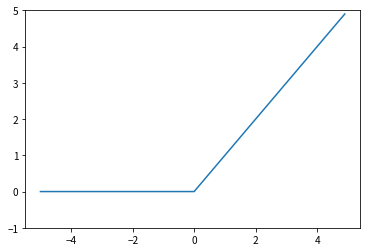

In [20]:
import matplotlib.pylab as plt

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x,y)
plt.ylim(-1, 5)
plt.show()